## Introduction to Scikit Learn
The notebook demonstrate some of the most useful functions of the beautiful scikit learn library.

### What we're going to cover:
0. An end-to-end scikit-learn overflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Imporve a model
6. Save and load a trained model
7. Putting it all together!

## 0.An end-to-end Scikit-Learn overflow

In [2]:
import numpy as np

In [3]:
#1. Get the data ready
import pandas as pd
heart_disease=pd.read_csv('heart-disease.csv');
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Create X (features matrix)
X=heart_disease.drop('target',axis=1)

#Create Y (labels)
Y=heart_disease['target']

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
#2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
#3.Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [9]:
clf.fit(X_train,Y_train);

In [10]:
# Make a predicition
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3


In [11]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3


In [12]:
Y_preds=clf.predict(X_test)

In [13]:
Y_preds

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [14]:
Y_test

100    1
223    0
301    0
302    0
123    1
      ..
141    1
185    0
180    0
240    0
138    1
Name: target, Length: 61, dtype: int64

In [15]:
#4 Evaluate the model on training data and test data
clf.score(X_train,Y_train)

1.0

In [16]:
clf.score(X_test,Y_test)

0.8032786885245902

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [18]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.82      0.86      0.84        37

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



In [19]:
confusion_matrix(Y_test,Y_preds)

array([[17,  7],
       [ 5, 32]])

In [20]:
accuracy_score(Y_test,Y_preds)

0.8032786885245902

In [21]:
#5. Improve the model
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set:{clf.score(X_test,Y_test)* 100 }% ")
    print("")

Trying model with 10 estimators...
Model accuracy on test set:75.40983606557377% 

Trying model with 20 estimators...
Model accuracy on test set:81.9672131147541% 

Trying model with 30 estimators...
Model accuracy on test set:80.32786885245902% 

Trying model with 40 estimators...
Model accuracy on test set:83.60655737704919% 

Trying model with 50 estimators...
Model accuracy on test set:80.32786885245902% 

Trying model with 60 estimators...
Model accuracy on test set:80.32786885245902% 

Trying model with 70 estimators...
Model accuracy on test set:81.9672131147541% 

Trying model with 80 estimators...
Model accuracy on test set:81.9672131147541% 

Trying model with 90 estimators...
Model accuracy on test set:80.32786885245902% 



In [22]:
#6. Save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [23]:
#load saved model
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8032786885245902

In [24]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]
executable: /Users/mdaziz/Desktop/sample_project/env/bin/python
   machine: macOS-15.0.1-arm64-arm-64bit

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 72.1.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: None
       pandas: 2.2.2
   matplotlib: 3.8.4
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 10
         prefix: libopenblas
       filepath: /Users/mdaziz/Desktop/sample_project/env/lib/libopenblasp-r0.3.21.dylib
        version: 0.3.21
threading_layer: pthreads
   architecture: armv8

       user_api: openmp
   internal_api: openmp
    num_threads: 10
         prefix: libomp
       filepath: /Users/mdaziz/Desktop/sample_project/env/lib/libomp.dylib
        version: None


In [25]:
#Lets listify the contents
what_we_are_covering=[
    "0. An end to end scikit learn overflow",
    "1. Getting the data ready",
    "2. Choose the right estimatory/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predicition on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a model",
    "7. Putting it all together!"
]

In [26]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

## 1. Getting our data ready to be used with machine learning

### Three Main thing we have to do:
    1. Split the data into features and label (usually `X` & `Y`)
    2. Filling (also called imputing) or disregarding the missing values
    3. Coverting non-numerical value to numerical values (also called feature encoding) 

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
X=heart_disease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
#Split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical 

In [32]:
car_sales=pd.read_csv('car-sales-extended.csv')

In [33]:
len(car_sales)

1000

In [34]:
car_sales['Doors'].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [37]:
# Split into X,y
X=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [38]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [39]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [40]:
# Split into training and test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [41]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [42]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [43]:
# Turn the categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [44]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [45]:
# Other way to convert non-numeric coulmn to numeric
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [46]:
# Lets refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model.fit(X_train,y_train);


In [47]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [48]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation )
2. Remove the sample with missing data together

In [49]:
#import car sales missing data
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')

In [50]:
len(car_sales_missing)

1000

In [51]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# Create X & y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']


In [54]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data with Pandas

In [55]:
car_sales_missing['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [56]:
## Note we are mannually filling Na data with our custom data in updated version of ColumnTransformer it will handle Na value
#Fill the 'Make' column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the 'Colours' column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the 'Odometer (KM) column'
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4,inplace=True)

/var/folders/v9/9d0p17pn7432nmn0qr304svw0000gn/T/ipykernel_7464/4058411056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna('missing',inplace=True)
/var/folders/v9/9d0p17pn7432nmn0qr304svw0000gn/T/ipykernel_7464/4058411056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [57]:
#Fix the pandas future warning
#Fill the 'Make' column
car_sales_missing.fillna({'Make':'missing'},inplace=True)

# Fill the 'Colours' column
car_sales_missing.fillna({'Colour':'missing'},inplace=True)

# Fill the 'Odometer (KM) column'
car_sales_missing.fillna({'Odometer (KM)':car_sales_missing['Odometer (KM)'].mean()},inplace=True)

# Fill the 'Doors' column
car_sales_missing.fillna({'Doors':4},inplace=True)

In [58]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [59]:
# Remove rows with missing Price value 
car_sales_missing.dropna(inplace=True)

In [60]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [61]:
len(car_sales_missing)

950

In [62]:
# Re split the data as we drop na record
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']


In [63]:
#before converting non numeric column data numeric column seprate the training and test data
#this is the best approch for better model traning it's good you don't mix up training data set with test data

X_missing=car_sales_missing.drop('Price',axis=1)
y_missing=car_sales_missing['Price']

In [64]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough',sparse_threshold=0)

transformed_X_missing=transformer.fit_transform(X_missing)


In [65]:
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

### Option 2 . Fill missing value with Scikit Learn

In [66]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [67]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [68]:
#Drop the row with no Label
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [69]:
#Split into X & y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [70]:
#Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical value with 'missing' and numercal value with 'mean'
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

#Define Column
cat_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']

#Create an imputer (Something that fills data)

imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

#Transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [71]:
car_sales_filled=pd.DataFrame(filled_X,columns=['Make','Colour','Doors','Ddometer (KM)'])


In [72]:
car_sales_filled.head()

,Make,Colour,Doors,Ddometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [73]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Ddometer (KM)    0
dtype: int64

In [74]:
# Lets try and convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [75]:
# Now we've got our data as numbers and filled (no missing values)
# Now let's fit a model

np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    transformed_X,
    y,
    test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [76]:
len(car_sales_filled), len(car_sales)

(950, 1000)

In [77]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

In [78]:
car_sales_filled

,Make,Colour,Doors,Ddometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


## 2 . Choosing the right estimator/algorithm for your problem
Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Classficiation problem - prediciting a category (heart disease or not)
    * Sometimes you'll see `clf` (short form of classifier) used as a classification estimator
* Regression problem - prediciting a number (selling price of a car)
if you're working on amaching learning problem and looking to use sklearn and not sure what model you should use refer to sklearn machine learning map : https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California  housing dataset

In [79]:
#Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [80]:
housing_df=pd.DataFrame(housing["data"],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [81]:
housing_df['target']=housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
housing_df=housing_df.drop('MedHouseVal',axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# Import algorithm / estimator
from sklearn.linear_model import Ridge
#Setup random seed
np.random.seed(42)

#Create the data
X=housing_df.drop("target",axis=1)
y=housing_df['target'] # median house price in $100,000s

#split into train and test data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

#Instantiate and fit the model (on the training set)

model=Ridge()
model.fit(X_train,y_train)

#check the score of the model(on the test set)
model.score(X_test,y_test)

In [84]:
#try with different algo or estimator linear_model

from sklearn import linear_model
np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5757877060324508

What if `Ridge` didn't work or the score didn't fit out needs?

Well , we could always try a different model 

how about we try an ensemble model (an enesembl is combination of smaller models to try and make better predicitions then just a single model)?

Sklearn ensemble model can be found here https://scikit-learn.org/stable/modules/ensemble.html


In [85]:
#try with another algo ensemble  randomforest Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8059809073051385

## 2.2 Picking a machine learning model for a classification problem
map https://scikit-learn.org/stable/machine_learning_map.html

In [86]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Cosutling the map and it says to try `LinearSVC`

In [87]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8688524590163934

In [88]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [89]:
#try another estimator randomForestClassifier

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

Tibdit:

    1. If you have structured data, used ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [90]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [91]:
what_we_are_covering

['0. An end to end scikit learn overflow',
 '1. Getting the data ready',
 '2. Choose the right estimatory/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predicition on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a model',
 '7. Putting it all together!']

## 3 Fit the model/algo on our data and use it to make predictions
### 3.1 Fitting the model to the data

Different names for:

    * X = features, features variables, data
    * y = labels, targets, targets variables

In [92]:
#import the randomForestClassifier estimator class
rom sklearn.ensemble import RandomForestClassifier

#Setup randkm seed
np.random.seed(42)

#Make the data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instnatiatie Radom Forest Classifier
clf=RandomForestClassifier()

#Fit the model to the data ( training the machine learning model)
clf.fit(X_train,y_train)

#Evaluate the Random forest classifier (use the patterns the model has learn)
clf.score(X_test,y_test)

SyntaxError: invalid syntax (3472018890.py, line 2)

In [ ]:
X.head()

In [ ]:
y.head()

### 3.2 Make Predictions using a machine learning model
2 ways to make predections:

1.  `predict()`
2. `predict_probo()`

In [ ]:
clf

In [94]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [95]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [97]:
clf.score(X_test,y_test)

0.8524590163934426

In [99]:
#Comparing predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [100]:
clf.score(X_test,y_test)

0.8524590163934426

In [104]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [105]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predection with `predict_proba()`


In [109]:
#predict_proba() returrns probabilities of a classifications label 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [110]:
#Let's predict on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [112]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [114]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [115]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create data
X=housing_df.drop('target',axis=1)
y=housing_df['target']

#split into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create model instance
model=RandomForestRegressor();

#Fit the model to the data
model.fit(X_train,y_train)

# Make predictions
y_preds= model.predict(X_test)

In [121]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [123]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [125]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3270458119670544

In [126]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three inbuilt ways to evaluate Scikit-learn model/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here : https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with a `score` method

In [135]:
from sklearn.ensemble import RandomForestClassifier
#Setup random seed
np.random.seed(42)

#Create X & y
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Create train & test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create a classifier model instance
clf=RandomForestClassifier(n_estimators=1000)

#Fit classifier to training data
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [136]:
#The highest value for the .score() method is 1.0 , the lowest is 0.0
clf.score(X_train,y_train)

1.0

In [137]:
clf.score(X_test,y_test)

0.8688524590163934

Let's use the `score()` on our regression problem...

In [138]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [145]:
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#Create X & y
X=housing_df.drop('target',axis=1)
y=housing_df['target']

#split data into train & test
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

#create regression model instance
model=RandomForestRegressor(n_estimators=100)

#Train the model with training data
model.fit(X_train,y_train)

RandomForestRegressor()

In [147]:
#The default score() evaluation metric is r_squared for regression algorithms 
#Highest = 1.0 , lowest=0.0

In [141]:
#estimator count 2
model.score(X_test,y_test)

0.6979664249351754

In [144]:
#estimator count 10
model.score(X_test,y_test)

0.7851752292818259

In [146]:
#estimator count 100
model.score(X_test,y_test)

0.8059809073051385

In [149]:
y_test.mean()

2.0550030959302323

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

### 4.2 Evaluating a model using the `scoring` parameter

In [153]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
#Setup random seed
np.random.seed(42)

#Create X & y
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#Create train & test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create a classifier model instance
clf=RandomForestClassifier(n_estimators=100)

#Fit classifier to training data
clf.fit(X_train,y_train);

In [154]:
clf.score(X_test,y_test)

0.8524590163934426

In [155]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [156]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [157]:
np.random.seed(42)

#single traning and test split score
clf_single_score=clf.score(X_test,y_test)

#take the mean of the 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y))

#compare the two
clf_single_score, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In [ ]:
#Default scoring parameters of classifier= mean accuracy
clf.score()

In [158]:
#scoring parameter set to none by default
cross_val_score(clf,X,y,cv=5,scoring=None)


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

#### Accuracy

In [165]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [160]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

clf=RandomForestClassifier()

cross_val_score=cross_val_score(clf,X,y)

In [161]:
np.mean(cross_val_score)

0.8248087431693989

In [164]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 82.48%


**Area under the receiver operating characteristics curve (AUC/ROC)**

* Area under curve(AUC)
* Roc curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predict 1 when truth is 1
* False positive = model predict 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [170]:
from sklearn.metrics import roc_curve

#Create training and test data
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.2)

#Fit the classifier
clf.fit(X_train,y_train)

#Make predections with probabilities
y_probs=clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.38, 0.62],
        [0.03, 0.97],
        [0.92, 0.08],
        [0.4 , 0.6 ],
        [0.09, 0.91],
        [0.02, 0.98],
        [0.11, 0.89],
        [0.76, 0.24],
        [0.59, 0.41],
        [0.5 , 0.5 ]]),
 61)

In [171]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.62, 0.97, 0.08, 0.6 , 0.91, 0.98, 0.89, 0.24, 0.41, 0.5 ])

In [172]:
#Calculate fpr, tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

#Check the false positive
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.20689655,
       0.20689655, 0.27586207, 0.27586207, 0.4137931 , 0.48275862,
       0.55172414, 0.55172414, 0.72413793, 0.79310345, 0.93103448,
       1.        ])

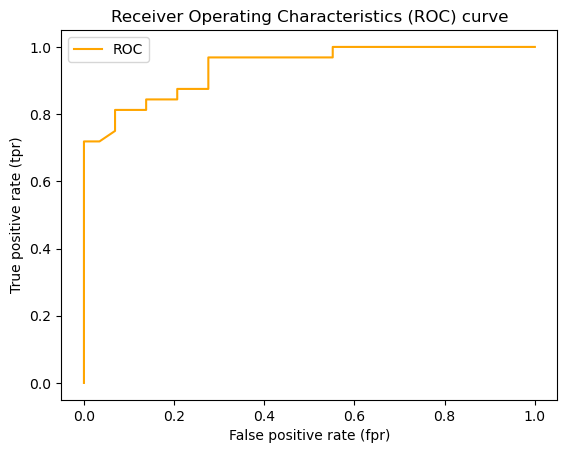

In [176]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr ) of a model.
    """

    #Plot roc curve
    plt.plot(fpr,tpr, color="orange",label="ROC")
    #Plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label="Guessing")

    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [175]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9401939655172413

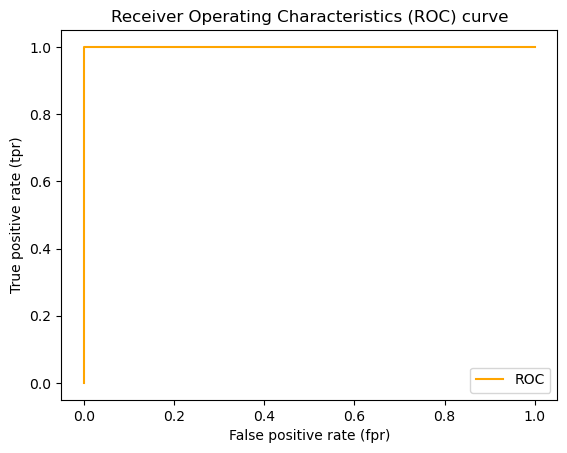

In [178]:
#Plot perfect ROC curve and AUC curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [179]:
#Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**